# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape,
              activation="relu",
              class_num=10,
              units=[1024, 512, 256, 256, 128, 128, 64]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for idx, unit in enumerate(units):
        if idx == 0:
            x = keras.layers.Dense(units=unit, activation=activation)(input_layer)
        else:
            x = keras.layers.Dense(units=unit, activation=activation)(x)

    result = keras.layers.Dense(units=class_num, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[result])

    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1651

In [18]:
## 超參數設定
"""
Set your required experiment parameters
"""
LR = 0.001
BATCH_SIZE = 256
EPOCH = 50
MOMENTUM = 0.95

sgd = keras.optimizers.SGD(lr=LR, momentum=MOMENTUM, nesterov=True)
rms = keras.optimizers.RMSprop(lr=LR)
adam = keras.optimizers.Adam(lr=LR, amsgrad=True)

optimizerArray = [sgd, rms, adam]

In [24]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for opti in optimizerArray:

    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    model.compile(optimizer=opti,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"]
                  )

    model.fit(x_train,y_train,
              validation_data = (x_test, y_test),
              batch_size = BATCH_SIZE,
              epochs = EPOCH
              )

    acc = model.history.history["accuracy"]
    val_acc = model.history.history["val_accuracy"]
    loss = model.history.history["loss"]
    val_loss = model.history.history["val_loss"]

    results[f"{opti}"] = {
        "acc":acc,
        "val_acc":val_acc,
        "loss": loss,
        "val_loss": val_loss
    }
    


=======] - 5s 102us/step - loss: 1.2104 - accuracy: 0.5680 - val_loss: 1.4167 - val_accuracy: 0.5007
Epoch 18/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.1834 - accuracy: 0.5760 - val_loss: 1.4465 - val_accuracy: 0.4959
Epoch 19/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.1628 - accuracy: 0.5840 - val_loss: 1.3333 - val_accuracy: 0.5248
Epoch 20/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.1423 - accuracy: 0.5899 - val_loss: 1.4239 - val_accuracy: 0.4996
Epoch 21/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.1200 - accuracy: 0.5991 - val_loss: 1.4609 - val_accuracy: 0.4924
Epoch 22/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.0943 - accuracy: 0.6073 - val_loss: 1.4200 - val_accuracy: 0.5111
Epoch 23/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.0704 - accuracy: 0.6164 - val_loss: 1.3798 - val_accuracy: 0.5222
Epoch

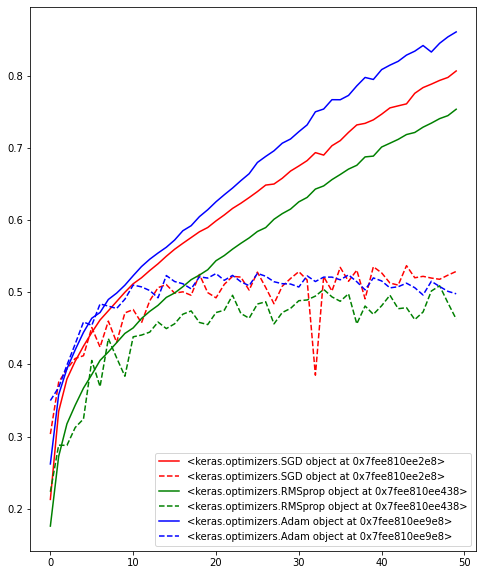

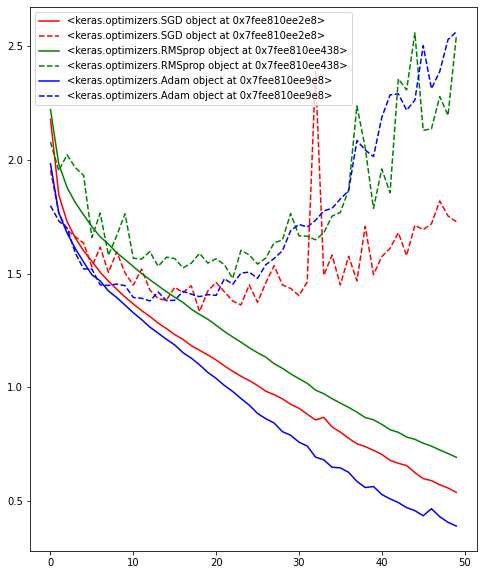

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

colorArray = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,10))

for idx, opti in enumerate(optimizerArray):
    
    plt.plot(
        range(EPOCH),
        results[f"{opti}"]["acc"],
        "-",
        label=f"{opti}",
        c=colorArray[idx]
    )

    plt.plot(
        range(EPOCH),
        results[f"{opti}"]["val_acc"],
        "--",
        label=f"{opti}",
        c=colorArray[idx]
    )

plt.legend()
plt.show()

plt.figure(figsize=(8,10))

for idx, opti in enumerate(optimizerArray):
    
    plt.plot(
        range(EPOCH),
        results[f"{opti}"]["loss"],
        "-",
        label=f"{opti}",
        c=colorArray[idx]
    )

    plt.plot(
        range(EPOCH),
        results[f"{opti}"]["val_loss"],
        "--",
        label=f"{opti}",
        c=colorArray[idx]
    )

plt.legend()
plt.show()